# XGBoost & LightGBM

- House Prices Dataset

In [1]:
# Install -

# !pip install xgboost
# !pip install lightgbm

### Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the Dataset

In [3]:
data = pd.read_csv("house_prices-3.csv")

### Step 3: Preprocessing

In [4]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

### Step 4: Exploratory Data Analysis (EDA) and Visualization

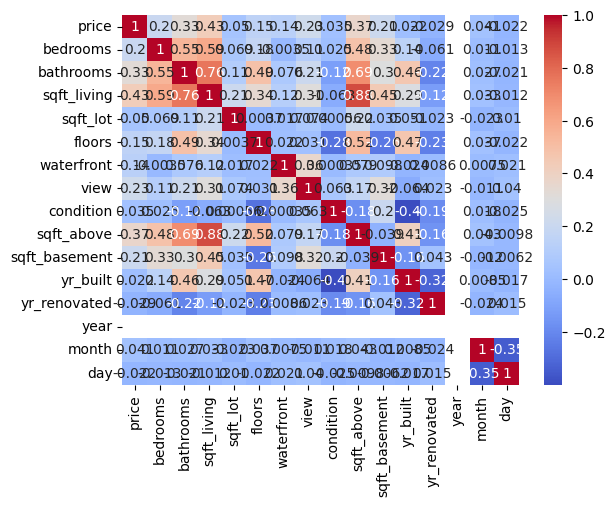

In [5]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


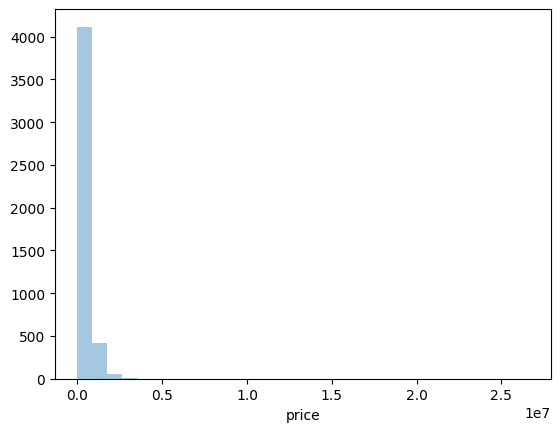

In [6]:
sns.distplot(data['price'], bins=30, kde=False)
plt.show()

### Step 5: Split the Data

In [7]:
X = data.drop('price', axis=1)
y = data['price']

### Step 6: Split the Dataset for Training and Testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 7: Train and Evaluate XGBoost Model

In [9]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f'XGBoost RMSE: {xgb_rmse}')
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost R-squared: {xgb_r2}")

XGBoost RMSE: 995332.8270514333
XGBoost R-squared: 0.028591467493225275


### Step 8: Train and Evaluate LightGBM Model

In [10]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print(f'LightGBM RMSE: {lgb_rmse}')
lgb_r2 = r2_score(y_test, lgb_pred)
print(f"LightGBM R-squared: {lgb_r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 3680, number of used features: 14
[LightGBM] [Info] Start training from score 544848.268818
LightGBM RMSE: 992145.1800476569
LightGBM R-squared: 0.034803558536137924


### Step 9: Comparing the result

In [11]:
print(f"XGBoost RMSE: {xgb_rmse}, ----- XGBoost R-squared: {xgb_r2}")
print('---------------------------------------------------------------------------')
print(f"LightGBM RMSE: {lgb_rmse}, ---- LightGBM R-squared: {lgb_r2}")

XGBoost RMSE: 995332.8270514333, ----- XGBoost R-squared: 0.028591467493225275
---------------------------------------------------------------------------
LightGBM RMSE: 992145.1800476569, ---- LightGBM R-squared: 0.034803558536137924
